# Linear Regression

In [20]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

In [21]:
data = pd.read_csv("../input/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
X = data[['bedrooms','bathrooms','sqft_living','floors','waterfront','grade','sqft_above','sqft_basement', 'sqft_living15']]
Y = data['price']

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
#xtrain = np.asmatrix(xtrain)
#xtest = np.asmatrix(xtest)
#ytrain = np.ravel(ytrain)
#ytest = np.ravel(ytest)

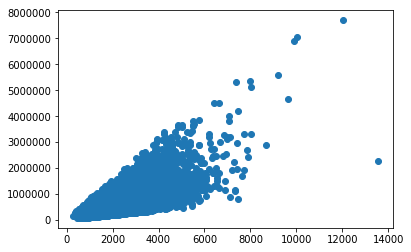

In [25]:
plt.scatter(X['sqft_living'], Y)
plt.show()

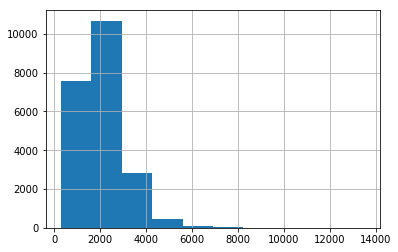

In [26]:
X['sqft_living'].hist()
plt.show()

In [27]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
train_pred = model.predict(xtrain)
test_pred = model.predict(xtest)

In [30]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_)))) ##model内的相关系数

,0,1
0,bedrooms,-2.463494e+04
1,bathrooms,-2.110787e+04
2,sqft_living,9.651457e+15
3,floors,-7.783575e+03
4,waterfront,8.101704e+05
5,grade,1.010207e+05
6,sqft_above,-9.651457e+15
7,sqft_basement,-9.651457e+15
8,sqft_living15,1.817826e+01


In [31]:
model.intercept_


-534448.1622325043

In [33]:
(abs(pred - ytrain) / ytrain).sum() / len(ytrain)

0.3267351859002227

In [34]:
(abs(test_pred - ytest) / ytest).sum() / len(ytest)

0.32333223806454575